## 1. Постановка задачи

### 1.1. Описание данных
Датасет содержит данные о продажах домов в округе штата Вашингтон, США - Окрг Кинг (King County), в который входит Сиэтл. Объекты были проданы с мая 2014 года по май 2015.<br>
<br><br> Содержатся данные о **21613 проданных объектах** с **21 атрибутом**: 
- `id` : идентификационный номер дома,
- `date` : дата продажи дома, 
- **`price`** : стоимость дома  (prediction target)
- `bedrooms`: количество спален/дом,  
- `bathrooms` : количество ванных комнат/спальни, 
- `sqft_living` : жилая площадь дома, 
- `sqft_lot` : площадь участка, 
- `floors` : кол-во этажей,
- `waterfront` : дом с видом на водоём, 
- `view` : рассматривается, 
- `condition` : состояние 
- `grade` : общая оценка, присуждаемая дому, на основе системы оценок округа Кинг
-  `sqft_above` : площадь дома отдельно от подвала
-  `sqft_basement` : площадь подвала
- `yr_built` : год постройки 
-  `yr_renovated` дата реновации 
- `zipcode` : почтовый индекс
- `lat` : широта 
- `long` : долгота
- `sqft_living15` : жилая площадь в 2015 году
- `sqft_lot15` : площадь участка в 2015

### 1.2. Цель работы
- Используя методы машинного обучения **разработать регрессионную модель** , которая смогла бы  **предсказывать цену дома**
<br><br>
- Найти модель с наилучшими характеристиками,  выбрав соответсвующие параметры

### 1.3. Поставленные задачи
Выполним следующие шаги:
1. Во-первых, проведём **анализ данных с использованием библиотек Python** для изучения переменных и зависимостей между ними,
2. Во-вторых, **построим графики наиболее важных зависимостей** ,
3. Затем будет проведена **предварительная обработка данных** , которая заключается в удалении неинформативных столбцов и разбиение набора данных на обучающие и тестовые выборки,
4. После этого построим **три регрессионные модели** :  линейную регрессию, Decision Tree регрессию и Random Forest регрессию и сравним характеристики моделей,
5. Наконец,  обсудим **результаты и возможные способы улучшения качества**.

## 2. Загрузка и исследование данных

### 2.1. Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import seaborn as sns 
import datetime 
import random 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

from statsmodels.stats.outliers_influence import variance_inflation_factor #проверка коллинеарности
from statsmodels.tools.tools import add_constant #проверка коллинеарности

### 2.2. Загрузка данных

In [2]:
house = pd.read_csv('house_sales.csv')

Загрузили csv, теперь создадим Date Frame - `house`, используя pandas.

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.3. Определим количество проданных объектов и кол-во атрибутов

In [4]:
print(f"Таблица содержит: {house.shape[0]} строк и {house.shape[1]} столбцов.")

Таблица содержит: 21613 строк и 21 столбцов.


### 2.4. Исследуем переменные

In [5]:
# обратим внимание на (index dtype, column dtypes, non-null values, memory usage)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### 2.5. Посмотрим на основную статистику

In [6]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Средняя цена дома **540 тыс.**. <br><br>
Интересное замечание! Кол-во спален сильно варьирует. Дельта = **33**.

### 2.6. Проверим, есть ли пропущенные значения

In [7]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Пропущенных значений нет** , иначе пришлось бы заполнять пропуски.

## 3. Предобработка данных

### 3.1. Удалим следующие столбцы
#### `zipcode`,`lat`,`long`,`sqft_living15`,`sqft_lot15`

In [8]:
house = house.drop(columns = ['zipcode','lat','long','sqft_living15','sqft_lot15'])

In [9]:
#house.head()

 (`zipcode`, `lat`,`long`) - переменные, описывающие местоположение.  `sqft_living15` и `sqft_lot15` не используются в моделях.

### 3.2. Создадим новые столбцы: `Age`, `WasRenovated`

Создадим новые столбцы: `Age` и `WasRenovated`, потому что они будут использоваться в регрессионной модели вместо столбцов `yr_built` и `yr_renovated`.

In [10]:
house['date']= pd.to_datetime(house['date'])

Изменили type столбца `date` (был object).

In [11]:
house['Age'] = house['date'].dt.year - house['yr_built']
house['Age'].head()

0    59
1    63
2    82
3    49
4    28
Name: Age, dtype: int64

**`WasRenovated`** станет бинарным. 0 (реновации НЕ было) or 1 (реновация была).

In [12]:
house['WasRenovated'] = house['yr_renovated'].apply(lambda x: 0 if x== 0 else 1)

## 4. Исследование переменных

### 4.1. Выясним, какие переменные являются зависимыми (`price`)

In [13]:
#параметры для графичков
sns.set(rc={'figure.figsize':(10,8)})

In [14]:
#шрифты для графиков
small = 11
medium = 13
big = 17

plt.rc('font', size=small)
plt.rc('axes', titlesize=medium)
plt.rc('axes', labelsize=medium)
plt.rc('xtick', labelsize=small)
plt.rc('ytick', labelsize=small)  
plt.rc('legend', fontsize=small)
plt.rc('axes', titlesize=big)

#### 4.1.1. Распределение домов по цене

Распределние показывает сколько объектов попадает в каждый диапазон.

Text(0.5, 1.0, 'Распределение по цене')

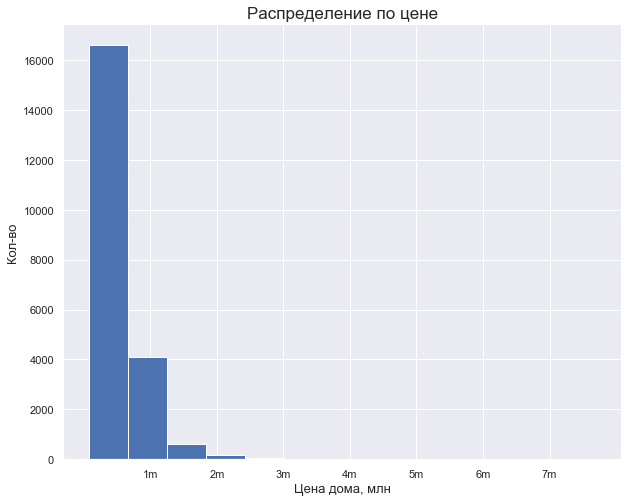

In [15]:
plt.hist(house['price'], bins = 13)
plt.xlabel('Цена дома, млн')
plt.ylabel('Кол-во')
plt.xticks(range(1000000,8000000,1000000),('1m','2m','3m','4m','5m','6m','7m','8m'))
plt.title('Распределение по цене')

Большинство домов в диапазоне **от 300k до 700k**. (медиана - 540 тыс)  <br> <br> Диапазон второй по величине группы домов - **от 700k до 1.1m.**

#### 4.1.2. Динамика цены во времени

Чтобы построить график группируем инф-ию по году и месяцу. 

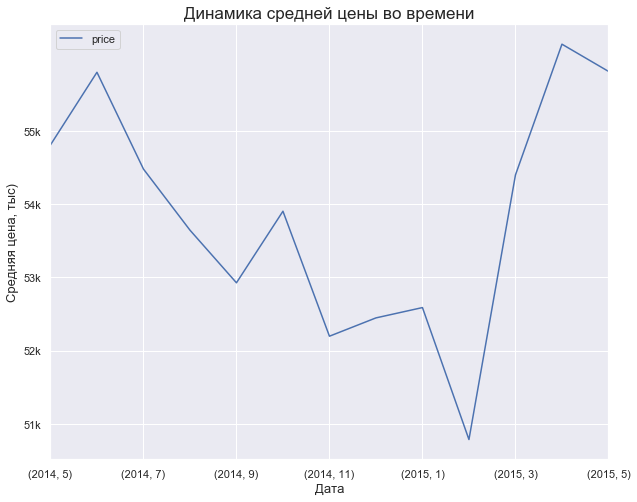

In [16]:
monthly_price=pd.DataFrame(house.groupby(by=[(house['date'].dt.year),(house['date'].dt.month)])
                           ['price'].mean()).plot()

plt.yticks(range(510000,560000,10000),('51k','52k','53k','54k','55k','56k'))
plt.xlabel('Дата')
plt.ylabel('Средняя цена, тыс)')
plt.title('Динамика средней цены во времени')
plt.show()

С мая 2014 цены три раза снижались, достигая минимумов: в сентябре 2014, ноябре 2014, феврале 2015. После февраля 2015 цены начинали стремительный рост, а в апреле опять снижались. <br><br>  Однако, говорить о тенденциях не будем, так как данные предоставлены за короткий промежуток времени.

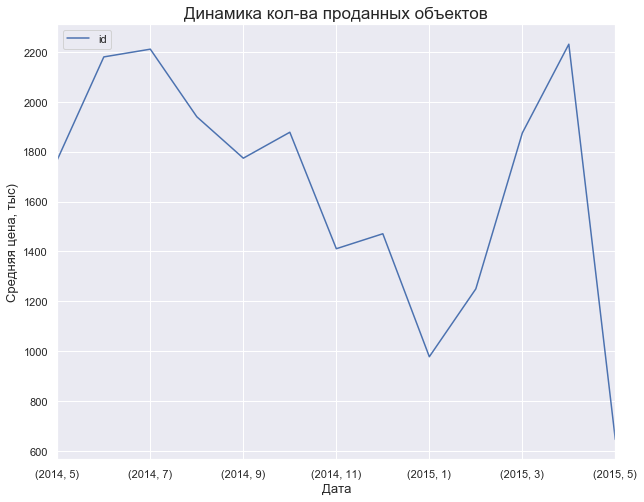

In [17]:
quantity =pd.DataFrame(house.groupby(by=[(house['date'].dt.year),(house['date'].dt.month)])
                           ['id'].count()).plot()

plt.xlabel('Дата')
plt.ylabel('Средняя цена, тыс)')
plt.title('Динамика кол-ва проданных объектов')
plt.show()

### 4.2. Исследуем зависимости между перемнными и ценой ( `price` )

#### 4.2.1. Корреляция Пирсона

До расчёта удалим столбцы: `date`,`id`, `yr_built`,`yr_renovated` 

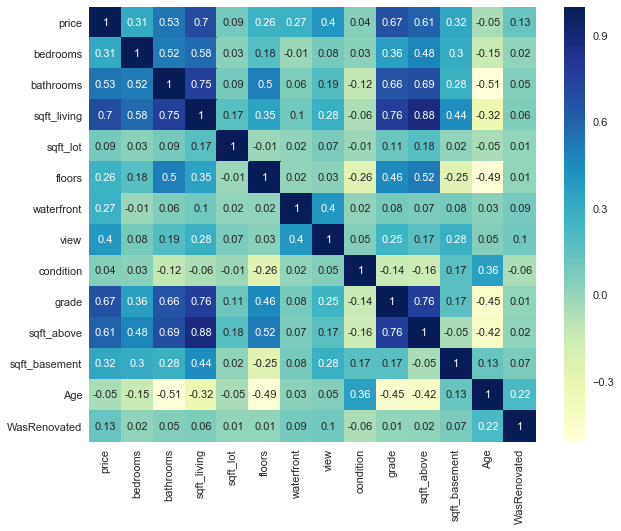

In [19]:
#df_corr = house.drop(columns = ['waterfront','id','date','yr_built', 'yr_renovated','WasRenovated'])
df_corr = house.drop(columns = ['id','date','yr_built', 'yr_renovated'])
corr_matrix = df_corr.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu")

Установим порог **0.4**  ниже которого переменная не коррелирует с ценой. <br> <br>
Переменные, которые сильно коррелированы с ценой : **sqft_living (0.7), grade (0.67), sqft_above (0.61), bathrooms (0.53),  view(0.4)**.

#### 4.2.2. Переменные с сильной корреляцией

#### Violin plots для `grade`

Text(0.5,1,'Цены на дома в зависимости от grade')

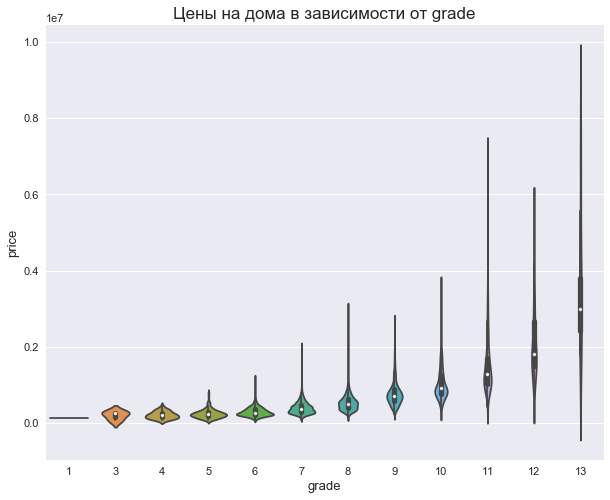

In [20]:
sns.violinplot(x = 'grade', y='price',data = house).set_title("Цены на дома в зависимости от grade")

Распределение цены в зависимости от оценки сильно отличается. Начиная с 3ьего балла медианы нелинейно возрастает.  <br><br>
По мере возрастания grade, цены всё с меньшей вероятностью находятся около медианы.

#### Box plots для `view`

Text(0.5,1,'Цены на дома в зависимости от просмотров')

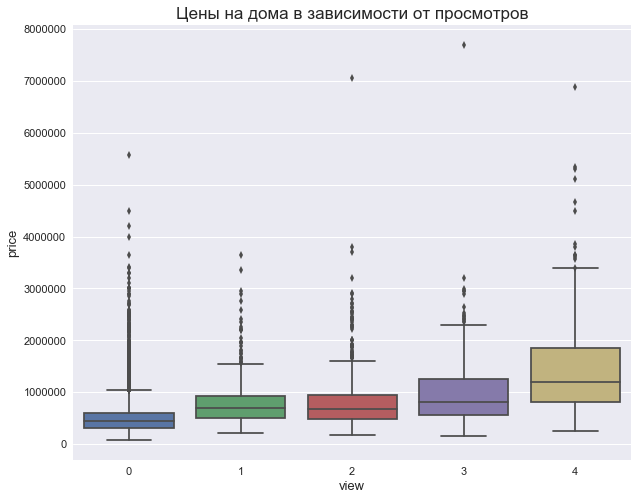

In [21]:
sns.boxplot(x = 'view',y='price',data = house).set_title("Цены на дома в зависимости от просмотров")

Медианная цена медленно увеличивается. <br><br>Чем выше балл за вид, тем больший диапазон значений может принять цена дома. <br><br>


#### Диаграммы рассеяния для `bathrooms`, `sqft_living`, `sqft_above`

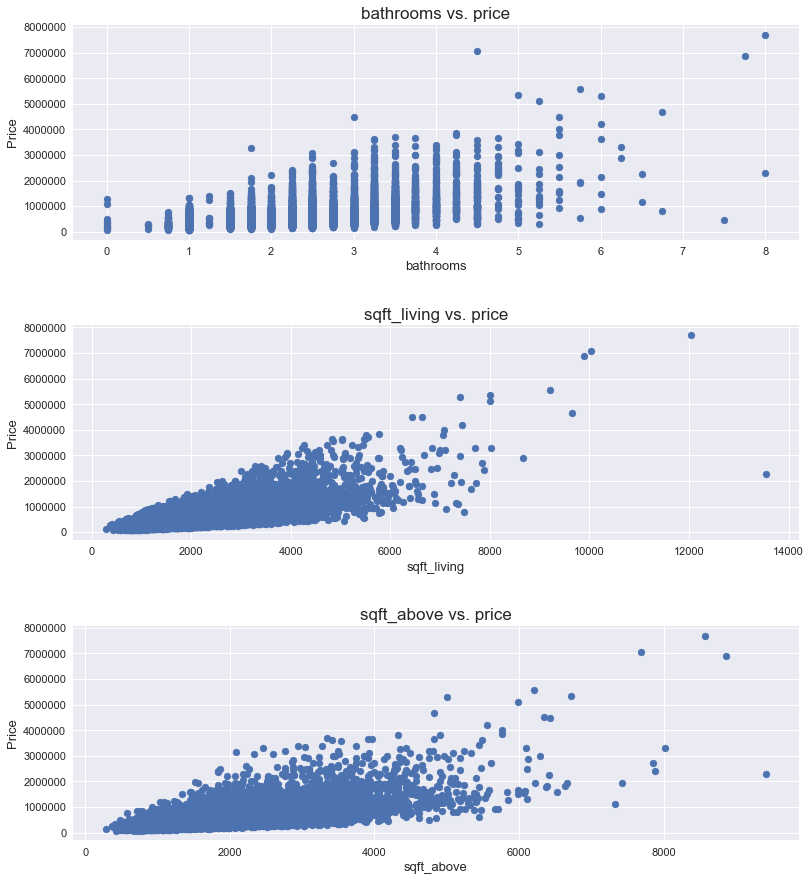

In [22]:
plt.figure(figsize=(13, 15))

features = ['bathrooms','sqft_living','sqft_above']
target = house['price']

for i, col in enumerate(features):
    plt.subplot(len(features),1, i+1)
    plt.subplots_adjust(hspace=0.4)
    x = house[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(f"{col} vs. price")
    plt.xlabel(col)
    plt.ylabel('Price')

Диаграммы рассеяния для price и `sqft_living` и для  price и `sqft_above` похожи между собой. Это неудивительно  - **коэфф. кореляция 0.88**   <br> <br> Цены на дома, в которых до 4 ванных - возрастают линейно, а в которых больше 4 ванн - сильно разнятся. 

#### 4.2.3. Проверим, влияет ли реновация на price
#### `WasRenovated`

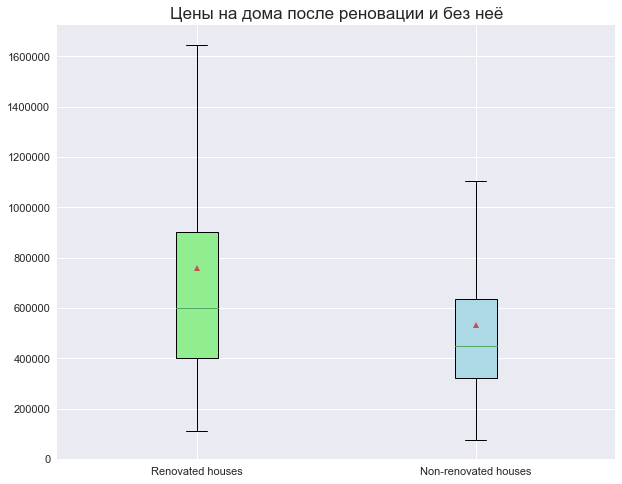

In [23]:
renovated = house[house['WasRenovated']==1]
not_renovated = house[house['WasRenovated']==0]

data = [renovated['price'],not_renovated['price']]

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(10, 8)
ax.set_title('Цены на дома после реновации и без неё')
box = ax.boxplot(data, showmeans=True, showfliers=False, patch_artist = True, 
           labels =['Renovated houses','Non-renovated houses'])
colors = ['lightgreen', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

Цены на дома, **не прошедших реновацию** ниже и располагаются около медианы. <br><br>
Разброс на цены на дома, **прошедших реновацию** - гораздо шире.  

### 4.3. На всякий случай проверим  `id`

Выясним, уникальный ли это идентификатор.

In [24]:
indx = pd.DataFrame(house['id'].value_counts().reset_index())
indx = indx.rename(columns={"index": "id", "id": "count_ids"})
print(indx)

               id  count_ids
0       795000620          3
1      2206700215          2
2       643300040          2
3      3333002450          2
4      1995200200          2
5      1781500435          2
6      3904100089          2
7      3323059027          2
8      6300000226          2
9      9809000020          2
10      723049156          2
11     1254200015          2
12     2560801222          2
13     6669020290          2
14     8651402750          2
15     3969300030          2
16     1237500540          2
17     4154300296          2
18     4302201085          2
19     1450100390          2
20     9250900104          2
21     4443800385          2
22     2892700041          2
23     5127001320          2
24     5083000375          2
25     2621600015          2
26     7129304540          2
27     4222310010          2
28     5101405604          2
29     2619920170          2
...           ...        ...
21406  2516000475          1
21407  9454200030          1
21408  8857640

Ids **НЕ уникальны**, поэтому попытаемся понять в чём причина.

In [25]:
house[house['id'].isin(indx['id'].where(indx['count_ids']>2))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,Age,WasRenovated
17602,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,64,0
17603,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,64,0
17604,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,65,0


Дома с повторяющимися id отличаются ценами. Иногда рахница в цене колоссальна (н-р, id=7888000390).  <br> <br> Так как мы не знаем наверняка причины изменений цен, наилучшим вариантом будет удаление этих объектов из выборки. (Удалять можно смело, так как таких объектов всего 1.6 процента)

In [26]:
house[house['id']==7888000390]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,Age,WasRenovated
1576,7888000390,2014-06-27,140000.0,3,1.0,1060,7473,1.0,0,0,3,7,1060,0,1959,0,55,0
1577,7888000390,2015-04-01,235000.0,3,1.0,1060,7473,1.0,0,0,3,7,1060,0,1959,0,56,0


In [27]:
house[house['id'].isin(indx['id'].where(indx['count_ids']>1))].shape[0] / house['id'].shape[0] * 100

1.6332762689122289

## 5. Подготовка данных

### 5.1. Сформируем из исходных данных множество объектов (Х) и мн-во ответов (y)
**Decision Tree Regression**, **Random Forest Regression**

In [28]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,Age,WasRenovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,28,0


In [29]:
X = house.drop(columns=['price','id','date','yr_built','yr_renovated'])

In [30]:
y = house.loc[:,'price']

In [31]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Age,WasRenovated
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,59,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,63,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,49,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0


### 5.2. Разведочный анализ данных

Прежде чем создавать модель Линейной регрессии, проверим фактор инфляции дисперсии (VIF), чтобы убедиться в отсутствии мультиколлинеарности.

In [32]:
df = add_constant(X)

pd.Series([variance_inflation_factor(df.values, i)
           for i in range(df.shape[1])],
          index=df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const            137.888867
bedrooms           1.640848
bathrooms          3.341054
sqft_living             inf
sqft_lot           1.061444
floors             1.879365
waterfront         1.201890
view               1.379485
condition          1.219465
grade              2.988733
sqft_above              inf
sqft_basement           inf
Age                1.999954
WasRenovated       1.140878
dtype: float64

`sqft_living`, `sqft_above`, `sqft_basement` сильно коррелированы с другими переменными! Поэтому будем  убирать эти переменные один за одним. <br><br>
фактор инфляции дисперсии. У остальных переменных VIF < 5, поэтому все норм. 

VIF = 1 / (1-Rj ^2 ) <br>
**VIF** означает "variance inflation factor", что переводится на русский язык как **фактор инфляции дисперсии** - чем он выше для j-го предиктора, тем сильнее линейная связь между этим и остальными предикторами. В приведенной выше формуле Rj - коэффициент детерминации j-го предиктора относительно остальных. Показатель VIF часто **используется в регрессионном анализе для выявления мультиколлинеарности** и последующего исключения из модели тех предикторов, у которых VIF оказывается слишком высоким. Существуют разные мнения по поводу того, какое значение VIF считать пороговым. Обычно критическим считают значение VIF = 5

In [33]:
X1 = X.drop(columns=['sqft_living'])

In [34]:
df = add_constant(X1)

pd.Series([variance_inflation_factor(df.values, i)
           for i in range(df.shape[1])],
          index=df.columns)

const            137.888867
bedrooms           1.640848
bathrooms          3.341054
sqft_lot           1.061444
floors             1.879365
waterfront         1.201890
view               1.379485
condition          1.219465
grade              2.988733
sqft_above         3.863002
sqft_basement      1.912940
Age                1.999954
WasRenovated       1.140878
dtype: float64

Теперь у всех переменных хороший VIF, поэтому они могутбыть использованы в модели Линейной регрессии.

### 5.3. Разделение данных на тестовую и обучающую выборки

In [35]:
#Decision Tree Regression, Random Forest Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 13)
(4323, 13)
(17290,)
(4323,)


In [36]:
#Linear Regression
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state=5, shuffle=True)
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 12)
(4323, 12)
(17290,)
(4323,)


## 6. Линейная регрессия

In [37]:
lin_model = LinearRegression()
lin_model.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
#'cv_lin' понадобится для отображения R-Squared
cv_lin = cross_validate(lin_model, X1, y, cv=5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
#cv_lin

In [39]:
#Allows the evaluation of single metrics 
sorted(cv_lin.keys()) 

['fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_r2',
 'train_neg_mean_squared_error',
 'train_r2']

In [40]:
print(cv_lin['train_r2'])

[0.65140369 0.65309082 0.65460232 0.65123764 0.65460414]


In [41]:
print(cv_lin['test_r2'])

[0.65442731 0.64943881 0.64101765 0.65604369 0.63440052]


Коэффициент детерминации колеблется для учебной выборки от **0.651 до 0.655** и для тестовой выборки от **0.641 до 0.656**.

In [42]:
y_train_predict = lin_model.predict(X1_train)
y_test_predict = lin_model.predict(X1_test)

In [43]:
def rmse_and_r2(model,y_train,y_train_predict,y_test,y_test_predict):
    '''
    функция выводит инфу о модели 
    включая  root-mean-square error(RMSE) и R-Squared
    '''
    train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    train_r2 = r2_score(y_train, y_train_predict)
    test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    test_r2 = r2_score(y_test, y_test_predict)
    
    print(f"Модель {model} для обучающей выборки:")
    print("--------------------------")
    print(f'RMSE = {round(train_rmse,3)}\nR2 = {round(train_r2,3)}')
    print(f"\n")
    print(f"Модель {model} для тестовой выборки:")
    print("--------------------------")
    print(f'RMSE = {round(test_rmse,3)}\nR2 = {round(test_r2,3)}')

In [44]:
rmse_and_r2('Linear Regression',y_train,y_train_predict,y_test,y_test_predict)

Модель Linear Regression для обучающей выборки:
--------------------------
RMSE = 216012.011
R2 = 0.653


Модель Linear Regression для тестовой выборки:
--------------------------
RMSE = 218031.179
R2 = 0.652


Видим, что модель может объяснить только **65%** дисперсии. Посредственный результат. <br> <br>
RMSE отображает как близко находятся фактические данные к предсказанным. 

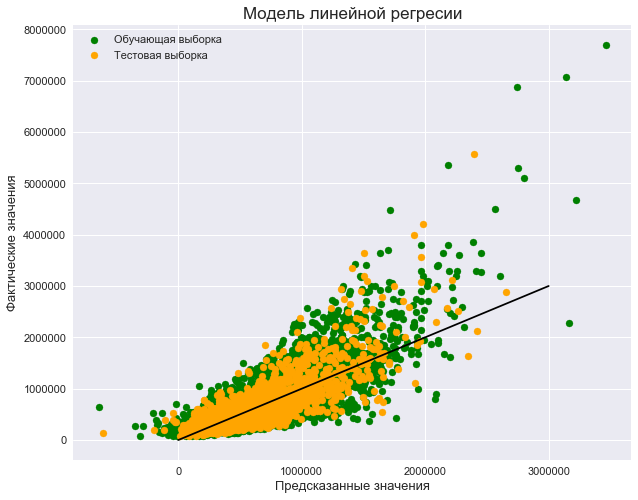

In [45]:
plt.scatter(y_train_predict, y_train, c = "green",  label = "Обучающая выборка")
plt.scatter(y_test_predict, y_test, c = "orange",  label = "Тестовая выборка")
plt.title("Модель линейной регресии")
plt.xlabel("Предсказанные значения")
plt.ylabel("Фактические значения")
plt.legend()
plt.plot([0, 3000000], [0, 3000000], c = "black")
plt.show()

Недостатки модели:
- между зависимыми и независимыми переменными должна быть линейная зависимость,
- чувствительна к выбросам,
- данные должны быть независимыми.

В контексте предсказания цены на дом модель Линейной регрессии оказалась не самой лучшей. 

## 6. Полиномиальная регрессия

In [46]:
pf = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
pf.fit(X1_train)
X_train_transformed = pf.transform(X1_train)
X_test_transformed = pf.transform(X1_test)
model = LinearRegression()
model.fit(X_train_transformed, y_train)

y_train_predict3 = model.predict(X_train_transformed)
y_test_predict3 = model.predict(X_test_transformed)

rmse_and_r2('Polynomial Regression, degree=2',y_train,y_train_predict3,y_test,y_test_predict3)

Модель Polynomial Regression, degree=2 для обучающей выборки:
--------------------------
RMSE = 187336.228
R2 = 0.739


Модель Polynomial Regression, degree=2 для тестовой выборки:
--------------------------
RMSE = 203998.452
R2 = 0.695


In [47]:
pf3 = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
pf3.fit(X1_train)
X_train_transformed = pf3.transform(X1_train)
X_test_transformed = pf3.transform(X1_test)
X1_transformed = pf3.transform(X1)
pol_model = LinearRegression()
pol_model.fit(X_train_transformed, y_train)
cv_pol = cross_validate(pol_model, X1_transformed, y, cv=5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [48]:
cv_pol['test_r2']

array([0.73532745, 0.72730382, 0.72160639, 0.70612152, 0.69291479])

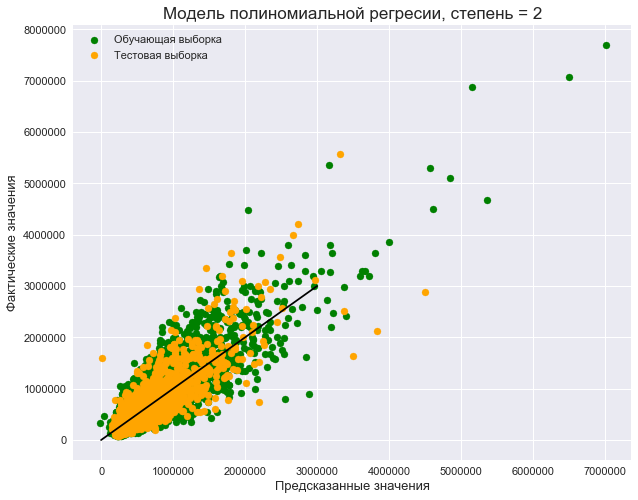

In [49]:
y_train_predict4 = pol_model.predict(X_train_transformed )
y_test_predict4 = pol_model.predict(X_test_transformed)

plt.scatter(y_train_predict4, y_train, c = "green",  label = "Обучающая выборка")
plt.scatter(y_test_predict4, y_test, c = "orange",  label = "Тестовая выборка")
plt.title("Модель полиномиальной регресии, степень = 2")
plt.xlabel("Предсказанные значения")
plt.ylabel("Фактические значения")
plt.legend()
plt.plot([0, 3000000], [0, 3000000], c = "black")
plt.show()

In [50]:
pf2= PolynomialFeatures(degree = 3, interaction_only=False, include_bias=True)
pf2.fit(X1_train)
X_train_transformed2 = pf2.transform(X1_train)
X_test_transformed2 = pf2.transform(X1_test)
model2 = LinearRegression()
model2.fit(X_train_transformed2, y_train)

y_train_predict4 = model2.predict(X_train_transformed2)
y_test_predict4 = model2.predict(X_test_transformed2)

rmse_and_r2('Polynomial Regression, degree=3',y_train,y_train_predict4,y_test,y_test_predict4)

Модель Polynomial Regression, degree=3 для обучающей выборки:
--------------------------
RMSE = 179390.337
R2 = 0.76


Модель Polynomial Regression, degree=3 для тестовой выборки:
--------------------------
RMSE = 206610.977
R2 = 0.687


## 7. Деревья Решений

In [51]:
regressor = DecisionTreeRegressor(min_samples_split = 100, random_state=45)

In [52]:
cv_tr = cross_validate(regressor, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [53]:
print(cv_tr['train_r2'])

[0.75307304 0.739048   0.7593591  0.76035429 0.76164234]


In [54]:
print(cv_tr['test_r2'])

[0.68105687 0.62639255 0.65991784 0.65841508 0.6258323 ]


К-т детерминации для обучающей выборки лежит в пределах от  **0.739 до 0.762** , для тестовой выборки - от  **0.626 до 0.681**. Похоже модель переобучилась.

In [55]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=100, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best')

In [56]:
y_train_predict = regressor.predict(X_train)
y_test_predict = regressor.predict(X_test)

In [57]:
rmse_and_r2('Decision Tree Regression',y_train,y_train_predict,y_test,y_test_predict)

Модель Decision Tree Regression для обучающей выборки:
--------------------------
RMSE = 180160.371
R2 = 0.758


Модель Decision Tree Regression для тестовой выборки:
--------------------------
RMSE = 213936.261
R2 = 0.665


In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.1, random_state=5, shuffle=True)
regressor.fit(X_train2, y_train2)
y_train_predict2 = regressor.predict(X_train2)
y_test_predict2 = regressor.predict(X_test2)
rmse_and_r2('Decision Tree Regression',y_train2, y_train_predict2,y_test2,y_test_predict2)

Модель Decision Tree Regression для обучающей выборки:
--------------------------
RMSE = 180206.933
R2 = 0.762


Модель Decision Tree Regression для тестовой выборки:
--------------------------
RMSE = 208578.488
R2 = 0.635


In [59]:
regressor

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=100, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best')

Несмотря на то, что модель переобучена, она все равно показывает лучший результат, чем модель Линейной регресии. 

Попробуем подобрать гиперпараметры

In [60]:
min_samples_split = [10, 20, 40, 80, 100, 110, 120, 150]
min_samples_leaf  = [2, 3, 5, 10, 20, 40, 50, 100]
max_depth = [2, 7, 10, 15, 20]

In [61]:
# otv = {}
# for split in min_samples_split:
#     for leaf in min_samples_leaf :
#         for depth in max_depth:
#             otv[str([split,leaf,depth])] = []

In [62]:
best_par = 0
best_r2 = 0
for split in min_samples_split:
    for leaf in min_samples_leaf :
        for depth in max_depth:
            regressor = DecisionTreeRegressor(min_samples_split = split,  min_samples_leaf=leaf,  max_depth=depth, random_state=45)
            cv_tr2 = cross_validate(regressor, X, y, cv=5, scoring=('r2'), return_train_score=True) 
            r2 = np.mean(cv_tr2['test_score'])
            #otv[str([split,leaf,depth])] += [r2]
            if r2 > best_r2:
                best_r2 = r2
                best_par = [split, leaf, depth]

In [63]:
print(best_par)
print(best_r2)

[20, 5, 7]
0.6662132880882703


## 9. Сравнение регрессионных моделей

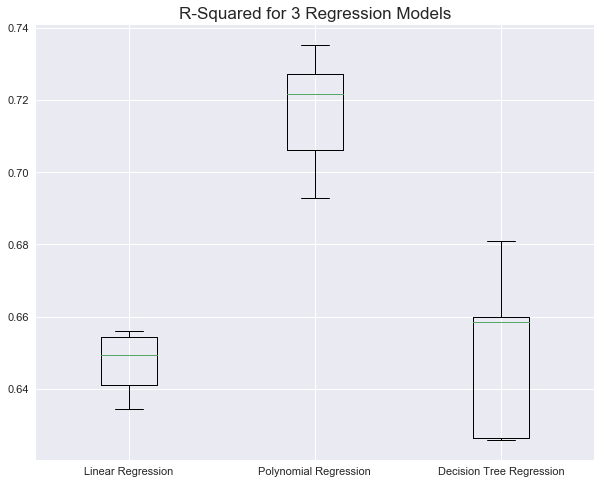

In [64]:
data = [cv_lin['test_r2'], cv_pol['test_r2'], cv_tr['test_r2']]
fig3, ax3 = plt.subplots()
ax3.set_title('R-Squared for 3 Regression Models')
ax3.boxplot(data, showfliers=False, 
            labels=['Linear Regression', 'Polynomial Regression' ,'Decision Tree Regression'])

plt.show()

## 10. Результаты и возможные способы улучшения качества

#### Результаты:
- Большинство домов стоят от 300 тыс.до 700 тыс.,
- Параметры, которые сильно коррелированы с ценой: grade, view, number of bathrooms, living space area, living area above ground level,
- Для предсказания цены дома рекомендуется использовать модель полиномиальной регрессии со степенью полинома = 2,

#### Возможные способы улучшения качества:
- Для усовершенствования моделей можно обратить внимание на особенности расположения дома. Н-р, продаваемый объект может находится вблизи туристических достопримечательностей, промышленных объектов, парков или славится преступностью. (так как нам доступны «zipcode», «lat» и «long»),
- Дерево решений можно попробовать улучшить, перебрав другие гиперпараметры,
- Можно попробовать создать другую модель с более точным прогнозом. (Случайный лес, метод ближайших К-соседей)
- Помимо R-Squared можно изучить другие метрики.

## 11. Randon Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=35, max_depth=7, random_state=17, max_features=6)
rfc.fit(X, y)

cv001 = cross_validate(rfc, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

In [78]:
cv001

{'fit_time': array([0.47577786, 0.46473265, 0.49071217, 0.4459281 , 0.4344759 ]),
 'score_time': array([0.0190475 , 0.00637269, 0.02030134, 0.01904893, 0.01562738]),
 'test_r2': array([0.71324404, 0.71225534, 0.69395139, 0.70863595, 0.69582708]),
 'train_r2': array([0.76664393, 0.76933813, 0.77413605, 0.77425641, 0.77436266]),
 'test_neg_mean_squared_error': array([-4.34366303e+10, -4.03494777e+10, -3.57516407e+10, -3.69846219e+10,
        -4.17820479e+10]),
 'train_neg_mean_squared_error': array([-3.04763253e+10, -3.07669972e+10, -3.14400021e+10, -3.08669820e+10,
        -3.02117062e+10])}

In [79]:
print(cv001['train_r2'])
print(cv001['test_r2'])

[0.76664393 0.76933813 0.77413605 0.77425641 0.77436266]
[0.71324404 0.71225534 0.69395139 0.70863595 0.69582708]


In [105]:
rfc2 = RandomForestRegressor(n_estimators=105, random_state=17)
rfc2.fit(X, y)

cv002 = cross_validate(rfc2, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

In [97]:
print(cv002['train_r2'])
print(cv002['test_r2'])

[0.96052595 0.95971311 0.96146135 0.96026035 0.96082662]
[0.72225546 0.7323638  0.7204542  0.71413488 0.68827645]


## 12. AdaBoost

In [83]:
from sklearn.ensemble import AdaBoostRegressor

In [109]:
abc = AdaBoostRegressor(n_estimators=30)

In [110]:
abc.fit(X, y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=30, random_state=None)

In [111]:
cv003 = cross_validate(abc, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

In [112]:
print(cv003['train_r2'])
print(cv003['test_r2'])

[0.48898722 0.53901301 0.47979772 0.53145777 0.43494794]
[0.49135298 0.5299561  0.37046344 0.47520403 0.37854624]


## 13. Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gbc = GradientBoostingRegressor(n_estimators=500)

In [100]:
gbc.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [101]:
cv004 = cross_validate(gbc, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

In [102]:
print(cv004['train_r2'])
print(cv004['test_r2'])

[0.82506306 0.82806105 0.83318335 0.83192407 0.83379302]
[0.75183476 0.72946108 0.73026262 0.72086893 0.67705941]


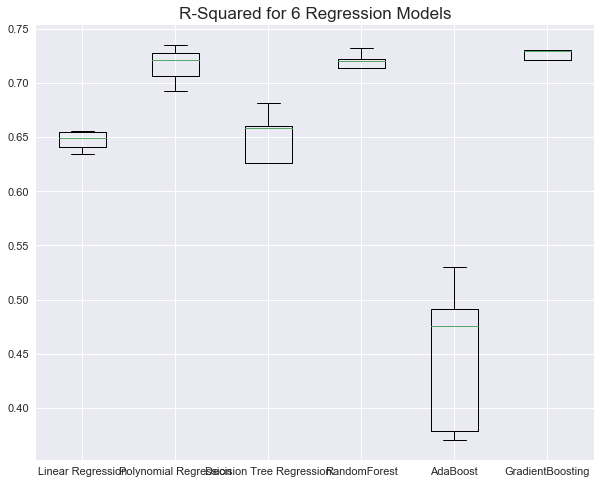

In [113]:
data = [cv_lin['test_r2'], cv_pol['test_r2'], cv_tr['test_r2'], cv002['test_r2'], cv003['test_r2'], cv004['test_r2']]
fig3, ax3 = plt.subplots()
ax3.set_title('R-Squared for 6 Regression Models')
ax3.boxplot(data, showfliers=False, 
            labels=['Linear Regression', 'Polynomial Regression' ,'Decision Tree Regression', 'RandomForest', 'AdaBoost', 'GradientBoosting'])

plt.show()

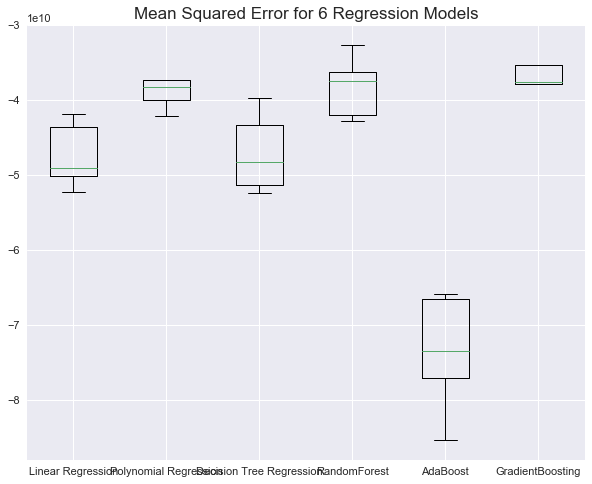

In [116]:
data = [cv_lin['test_neg_mean_squared_error'], cv_pol['test_neg_mean_squared_error'], cv_tr['test_neg_mean_squared_error'], cv002['test_neg_mean_squared_error'], cv003['test_neg_mean_squared_error'], cv004['test_neg_mean_squared_error']]
fig3, ax3 = plt.subplots()
ax3.set_title('Mean Squared Error for 6 Regression Models')
ax3.boxplot(data, showfliers=False, 
            labels=['Linear Regression', 'Polynomial Regression' ,'Decision Tree Regression', 'RandomForest', 'AdaBoost', 'GradientBoosting'])

plt.show()

### Воспользуемся GridSearch

In [117]:
from sklearn.model_selection import GridSearchCV

Найдём лучшие параметры для Случайного леса

In [125]:
param_grid_rfc = {"n_estimators": [10,20,30,50,100,150], "max_features": ["auto", "sqrt", "log2"], 
                  "min_samples_split" : [2,4,8],    "bootstrap": [True, False],  'max_depth':[5,12,25,30,100], 
                  'max_features':[3,5,6]}


In [126]:
grid_rfc = GridSearchCV(rfc, param_grid_rfc, n_jobs=-1, cv=5)

In [127]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=35, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 50, 100, 150], 'max_features': [3, 5, 6], 'min_samples_split': [2, 4, 8], 'bootstrap': [True, False], 'max_depth': [5, 12, 25, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
grid_rfc.best_score_ , grid_rfc.best_params_

(0.7206611215834702,
 {'bootstrap': True,
  'max_depth': 12,
  'max_features': 5,
  'min_samples_split': 8,
  'n_estimators': 100})

Найдём лучшие параметры для AdaBoost

In [130]:
param_grid_abc = {"n_estimators": [10,30,50,100,150], 'loss':['linear', 'square', 'exponential'], 'learning_rate':[0.01, 0.1, 0.5, 1, 3, 5] }

In [131]:
grid_abc = GridSearchCV(abc, param_grid_abc, n_jobs=-1, cv=5)

In [132]:
grid_abc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=30, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 50, 100, 150], 'loss': ['linear', 'square', 'exponential'], 'learning_rate': [0.01, 0.1, 0.5, 1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
grid_abc.best_score_ , grid_abc.best_params_

(0.5938685996790548,
 {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50})

Найдём лучшие параметры для GradientBoosting

In [134]:
param_grid_gbc = {'n_estimators': [30, 100, 500], 'max_depth': [4, 7, 12], 'min_samples_split': [2,4,9], 'learning_rate': [0.01, 0.1, 1]}

In [137]:
grid_gbc = GridSearchCV(gbc, param_grid_gbc, n_jobs=-1, cv=5)

In [138]:
grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [30, 100, 500], 'max_depth': [4, 7, 12], 'min_samples_split': [2, 4, 9], 'learning_rate': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [139]:
grid_gbc.best_score_ , grid_gbc.best_params_

(0.7325729496801731,
 {'learning_rate': 0.1,
  'max_depth': 4,
  'min_samples_split': 9,
  'n_estimators': 500})

### Обучаем новые модели

In [140]:
rfc_new = RandomForestRegressor(bootstrap=True, max_depth=12, max_features=5, min_samples_split=8, n_estimators=100)
rfc_new.fit(X, y)

cv001_new = cross_validate(rfc_new, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

In [141]:
abc_new = AdaBoostRegressor(learning_rate=0.1, loss='linear', n_estimators=50)
abc_new.fit(X, y)
cv003_new = cross_validate(abc_new, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

In [142]:
gbc_new = GradientBoostingRegressor(n_estimators=500)
gbc_new.fit(X, y)
cv004_new = cross_validate(gbc_new, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

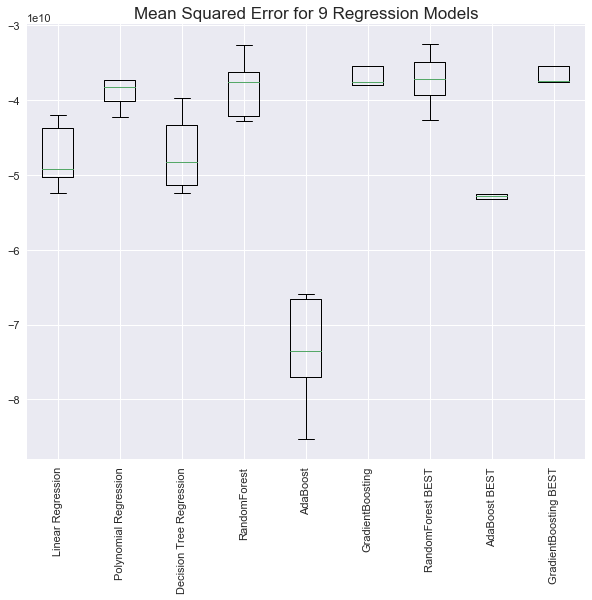

In [145]:
data = [cv_lin['test_neg_mean_squared_error'], cv_pol['test_neg_mean_squared_error'], cv_tr['test_neg_mean_squared_error'], 
        cv002['test_neg_mean_squared_error'], cv003['test_neg_mean_squared_error'], cv004['test_neg_mean_squared_error'], 
         cv001_new['test_neg_mean_squared_error'], cv003_new['test_neg_mean_squared_error'], cv004_new['test_neg_mean_squared_error']]
fig3, ax3 = plt.subplots()
ax3.set_title('Mean Squared Error for 9 Regression Models')
ax3.boxplot(data, showfliers=False, 
            labels=['Linear Regression', 'Polynomial Regression' ,'Decision Tree Regression', 'RandomForest', 'AdaBoost', 'GradientBoosting', 'RandomForest BEST', 'AdaBoost BEST', 'GradientBoosting BEST'])
plt.xticks(rotation = 90);
plt.show()

### Вывод:

Лучшие характеристики показывает **GradientBoosting**

In [148]:
cv004_new['test_r2'].mean()

0.7223647270965741